* Nama: Arif Muhammad Laduni
* NIM: 1103213003
* Lecture 2 : Linear Regression on Salary Prediction
* Dataset: Salary_Data_Simple_SVR.csv
* Dokumentasi Chatgpt: https://chat.openai.com/c/13cc7fc4-091a-4896-b215-fe923dbbe867




menyambungkan google colab dengan google drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 1 import semua library yang akan digunakan dan memuat dataset yang digunakan

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [17]:
# Memuat dataset
data = pd.read_csv('Salary_Data_Simple_SVR.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Step 2 membuat proses dari model linearRegression dan melakukan evaluasi dengan menggunakan beberapa perhitungan

In [18]:
# Memisahkan fitur (pengalaman) dan target (gaji)
X = data[['YearsExperience']]
y = data['Salary']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Memprediksi gaji menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 49830096.85590839


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# Menghitung R^2 Score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
R^2 Score: 0.9024461774180497


step 3 melakukan visualisasi dari tahap LinearRegression yang telah dilakukan

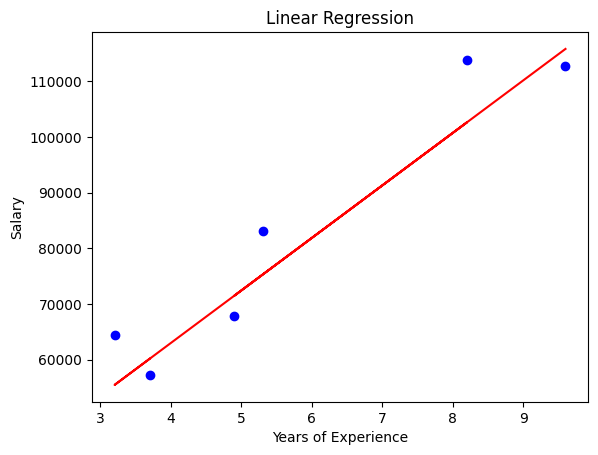

In [21]:
# Plot hasil prediksi
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

    YearsExperience    Actual      Predicted
27              9.6  112635.0  115790.210113
15              4.9   67938.0   71498.278095
23              8.2  113812.0  102596.868661
17              5.3   83088.0   75267.804224
8               3.2   64445.0   55477.792045
9               3.7   57189.0   60189.699707


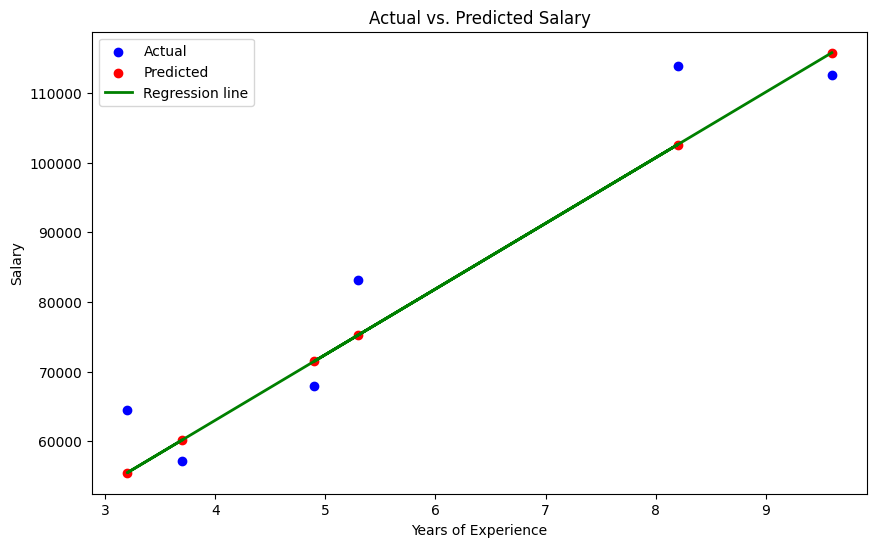

In [24]:
# Membuat dataframe untuk data uji dan nilai prediksi
results = pd.DataFrame({'YearsExperience': X_test['YearsExperience'], 'Actual': y_test, 'Predicted': y_pred})

# Menampilkan hasil
print(results)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results['YearsExperience'], results['Actual'], color='blue', label='Actual')
plt.scatter(results['YearsExperience'], results['Predicted'], color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression line')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()